In [1]:
#Assignment 2: Cleaning and Preparing an E-Commerce Customer Reviews Dataset
#Objective:
#To clean and prepare a dataset containing customer reviews and ratings of e-commerce products.
#Instructions:
#Load the dataset containing customer reviews, ratings, and feedback.

#Handle missing values:
#Identify missing values in Review_Text, Rating, and Customer_Age.
#Impute missing numerical values using appropriate techniques.
#Use NLP-based techniques to handle missing textual data.

#Detect and remove duplicates:
#Use duplicated() to find repeated reviews.
#Remove or merge duplicate records.

#Handle inconsistent data:
#Standardize Rating values (ensure they range between 1-5).
#Correct spelling inconsistencies in Product_Category.

#Identify and handle outliers:
#Use boxplots to find anomalies in Product_Price and Rating.
#Apply transformation techniques if necessary.

#Prepare cleaned data for analysis:
#Convert categorical data into numerical format where required.
#Save the final cleaned dataset as a CSV file.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
Percentage of Missing Values for Each Column:
 Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64
Duplicate Reviews:
      Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0           1         Clothing         3262.0         

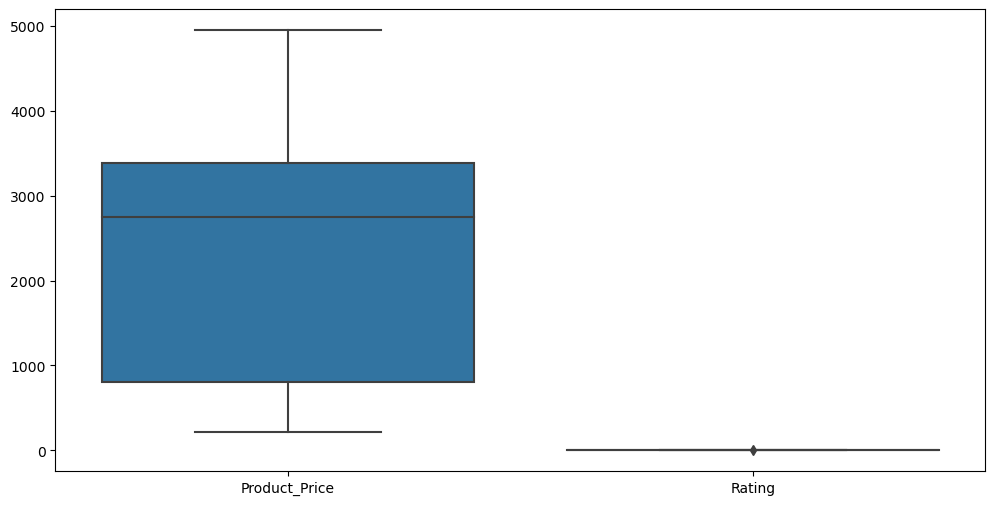

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Step 1: Load the Dataset
file_path = r'C:\ML\Day 20_E-Commerce_Data.csv'
df = pd.read_csv(file_path)

# Step 2: Handle Missing Values
# Identify missing values
missing_values = df.isna()
df.info()
missing_percentage = df.isna().mean() * 100
print("Percentage of Missing Values for Each Column:\n", missing_percentage)

# Impute missing numerical values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].mean(), inplace=True)

# Use NLP-based techniques to handle missing textual data
df['Review_Text'].fillna('No review provided', inplace=True)

# Step 3: Detect and Remove Duplicates
# Detect duplicates
duplicates = df.duplicated(subset=['Review_Text'], keep=False)
print("Duplicate Reviews:\n", df[duplicates])

# Remove duplicates
df.drop_duplicates(subset=['Review_Text'], inplace=True)

# Step 4: Handle Inconsistent Data
# Standardize Rating values
df['Rating'] = df['Rating'].apply(lambda x: 5 if x > 5 else (1 if x < 1 else x))

# Correct spelling inconsistencies in Product_Category
df['Product_Category'] = df['Product_Category'].str.lower().str.replace('electronics', 'electronic')
df['Product_Category'] = df['Product_Category'].str.lower().str.replace('clothng', 'clothing')

# Step 5: Identify and Handle Outliers
# Use boxplots to find anomalies
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Product_Price', 'Rating']])
plt.show()

# Apply transformation techniques if necessary
df['Product_Price'] = df['Product_Price'].apply(lambda x: df['Product_Price'].median() if x > df['Product_Price'].quantile(0.99) else x)

# Step 6: Prepare Cleaned Data for Analysis
# Convert categorical data into numerical format
df = pd.get_dummies(df, columns=['Product_Category'], drop_first=True)

# Save the final cleaned dataset as a CSV file
df.to_csv('Day 20_E-Commerce_Data.csv', index=False)
